In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, ConfusionMatrixDisplay

In [2]:
# Loading dataset
df = pd.read_csv('hr.csv')

In [3]:
# Data Profiling and Analysis
print(df.head())
print(df.info())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.24             0.79               2                   175   
1                0.40             0.49               2                   155   
2                0.45             0.45               2                   154   
3                0.46             0.73               6                   256   
4                0.14             0.54               5                   275   

   time_spend_company  Work_accident left  promotion_last_5years   Department  \
0                   5              0    0                      0           IT   
1                   3              0    1                      0           hr   
2                   3              1    1                      0      support   
3                   4              0    0                      0  product_mng   
4                   4              1    0                      0        sales   

   salary   age  
0     low   Na

In [4]:
# describe all the numeric columns
# pd.set_option('display.max_columns', 100)
print(df.describe().transpose())

                         count        mean        std    min     25%     50%  \
satisfaction_level     15004.0    0.612871   0.248628   0.09    0.44    0.64   
last_evaluation        15004.0    0.716096   0.171163   0.36    0.56    0.72   
number_project         15004.0    3.802919   1.232550   2.00    3.00    4.00   
average_montly_hours   15004.0  201.044655  49.937662  96.00  156.00  200.00   
time_spend_company     15004.0    3.497934   1.460012   2.00    3.00    3.00   
Work_accident          15004.0    0.144561   0.351670   0.00    0.00    0.00   
promotion_last_5years  15004.0    0.021261   0.144258   0.00    0.00    0.00   
age                     3080.0   27.018506   1.429511  25.00   26.00   27.00   

                          75%    max  
satisfaction_level       0.82    1.0  
last_evaluation          0.87    1.0  
number_project           5.00    7.0  
average_montly_hours   245.00  310.0  
time_spend_company       4.00   10.0  
Work_accident            0.00    1.0  
promot

In [5]:
# describe all the non-numeric columns
print(df.describe(include = object))

         left Department salary
count   15004      15004  14975
unique      3         10      3
top         0      sales    low
freq    11428       4140   7289


In [6]:
# display all the non-numeric values
print(df['Department'].unique())
print(df['salary'].unique())
print(df['left'].unique())

['IT' 'hr' 'support' 'product_mng' 'sales' 'technical' 'marketing'
 'management' 'accounting' 'RandD']
['low' 'medium' 'high' nan]
['0' '1' '?']


In [7]:
# Checking for Missing Data
print(df.isna().sum())

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
left                         0
promotion_last_5years        0
Department                   0
salary                      29
age                      11924
dtype: int64


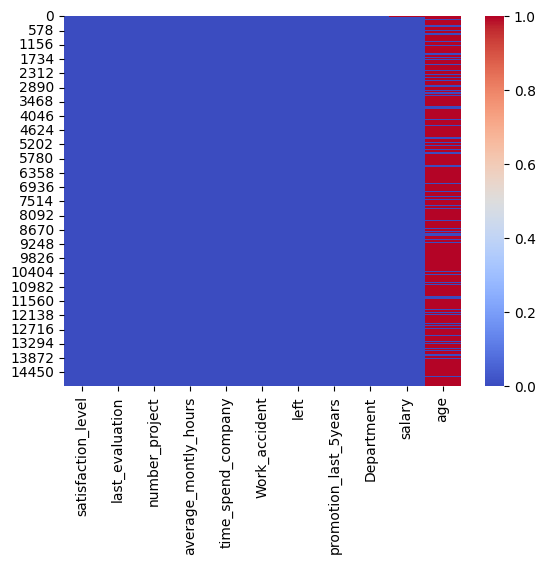

None


In [8]:
# plotting heatmap to show the intensity of missing data
sns.heatmap(df.isna(), cmap = 'coolwarm')
print(plt.show())

In [9]:
# age column missing more than 70% of the data. hence, we drop it
df.drop('age', axis = 1, inplace = True)
print(df.head())  # age column is dropped, useless for ML model

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.24             0.79               2                   175   
1                0.40             0.49               2                   155   
2                0.45             0.45               2                   154   
3                0.46             0.73               6                   256   
4                0.14             0.54               5                   275   

   time_spend_company  Work_accident left  promotion_last_5years   Department  \
0                   5              0    0                      0           IT   
1                   3              0    1                      0           hr   
2                   3              1    1                      0      support   
3                   4              0    0                      0  product_mng   
4                   4              1    0                      0        sales   

   salary  
0     low  
1  mediu

In [10]:
# salary column is also missing some data
print(df.loc[df.isna().any(axis = 1)])  # this shows that salary is missing in 29 rows.

       satisfaction_level  last_evaluation  number_project  \
8                    0.60             0.91               4   
205                  0.74             0.50               5   
337                  0.44             0.49               2   
497                  0.90             0.66               3   
711                  0.13             0.67               3   
2075                 0.13             0.50               3   
2654                 0.24             0.50               4   
3463                 0.52             0.72               3   
3611                 0.13             0.62               3   
3644                 0.96             0.51               4   
4242                 0.78             0.89               4   
5873                 0.81             0.67               4   
6649                 0.10             0.91               6   
7881                 0.87             0.41               3   
8149                 0.71             0.60               2   
8223    

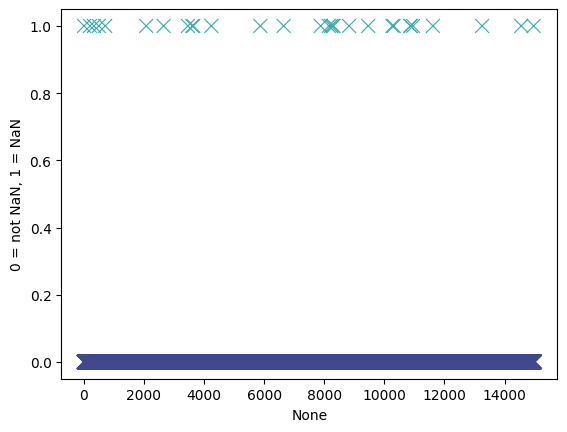

None


In [11]:
# Visual representation of the 29 missing NaN in Salary
sns.scatterplot(y = df['salary'].isna(), x = df.index, marker = 'x', s = 100, hue = df['salary'].isna(),
                palette = 'mako', legend = False)
plt.ylabel('0 = not NaN, 1 = NaN')
print(plt.show())

In [12]:
#  since only 29 rows out of 15004 rows are empty, we can drop NaN salary rows
df.dropna(subset = ['salary'], inplace = True)
print(df.isna().sum())  # all 29 rows has been removed.

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [16]:
# ? in left column.
print(df.loc[df['left'] == '?'].transpose())
'''there are 4 rows with '?' values in out target variable.
these are unknown cases in our target variable. it is sensible to consider this as a NaN value and we should
drop such rows '''

                            7864     8309         10830 12652
satisfaction_level           0.72     0.96         0.55  0.96
last_evaluation              0.67     0.54         0.96  0.75
number_project                  5        3            3     4
average_montly_hours          210      198          194   177
time_spend_company              2        3            3     2
Work_accident                   0        0            0     0
left                            ?        ?            ?     ?
promotion_last_5years           0        0            0     0
Department             management  support  product_mng    IT
salary                     medium      low       medium   low


"there are 4 rows with '?' values in out target variable.\nthese are unknown cases in our target variable. it is sensible to consider this as a NaN value and we should\ndrop such rows "

In [17]:
# dropping entire rows with target = ? as this is our dependent variable.
df.drop(df[df['left'] == '?'].index, inplace = True)
print(f'Any = {df.loc[df['left'] == '?']}')

Any = Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, left, promotion_last_5years, Department, salary]
Index: []


In [18]:
# Encoding Ordinal Data to Numerical.
'''This is a necessary step to convert categorical data into quantitative data
 for our ML model to understand and give us better output'''
# salary and left is object which means they need to be converted into int.

'This is a necessary step to convert categorical data into quantitative data\n for our ML model to understand and give us better output'

In [22]:
label_encoder = LabelEncoder()
df['salary_encoded'] = label_encoder.fit_transform(df['salary'])
custom_mapping = {'low': 0, 'medium': 1, 'high': 2}
df['salary_encoded'] = df['salary'].map(custom_mapping)

print(df[['salary', 'salary_encoded']].head())  # comparing a newly created column with its origin

   salary  salary_encoded
0     low               0
1  medium               1
2  medium               1
3    high               2
4    high               2


In [23]:
df['left_encoded'] = label_encoder.fit_transform(df['left'])
custom_mapping2 = {'0': 0, '1': 1}
df['left_encoded'] = df['left'].map(custom_mapping2)

print(df[['left', 'left_encoded']].head())  # comparing a newly created column with its origin

  left  left_encoded
0    0             0
1    1             1
2    1             1
3    0             0
4    0             0


In [26]:
# Exploratory Data Analysis and Inspection

# creating a function for count_plot

def count_plot(feature, color_palette):
    count_p = sns.countplot(data = df, x = feature, hue = 'left', palette = color_palette)
    count_p.bar_label(count_p.containers[0], fontsize = 7)
    count_p.bar_label(count_p.containers[1], fontsize = 7)
    plt.xticks(rotation = 45, fontsize = 7)
    print(plt.show())

In [27]:
# creating function for hist_plot

def hist_plot(feature, color_palette):
    count_h = sns.histplot(data = df, x = df[feature], hue = 'left', palette = color_palette)
    count_h.bar_label(count_h.containers[0], fontsize = 7, rotation = 90)
    count_h.bar_label(count_h.containers[1], fontsize = 7, rotation = 90)
    print(plt.show())

In [29]:
# creating function for boxplot

def box_plot(feature, color_palette):
    sns.boxplot(data = df, x = df['left'], y = df[feature], hue = 'left', palette = color_palette)
    plt.title(f'average = {df[feature].mean()}')
    print(plt.show())

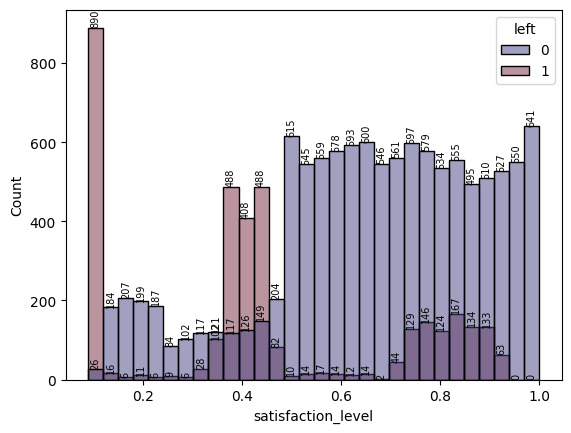

None


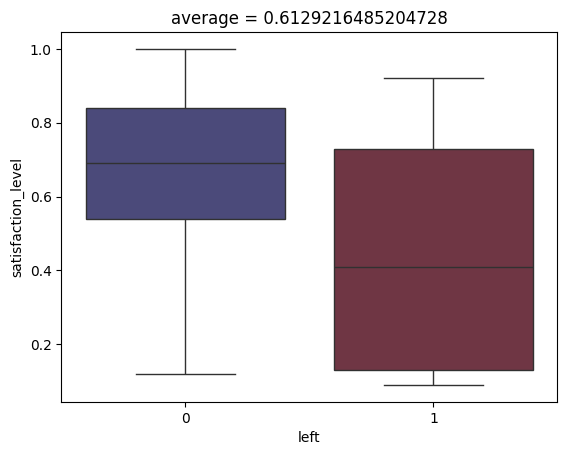

None


In [30]:
# Analysing Independent Variables (X)

# satisfaction level
hist_plot('satisfaction_level', 'icefire')
box_plot('satisfaction_level', 'icefire')

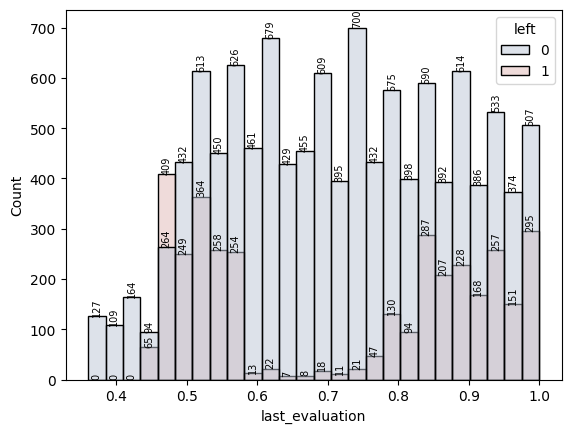

None


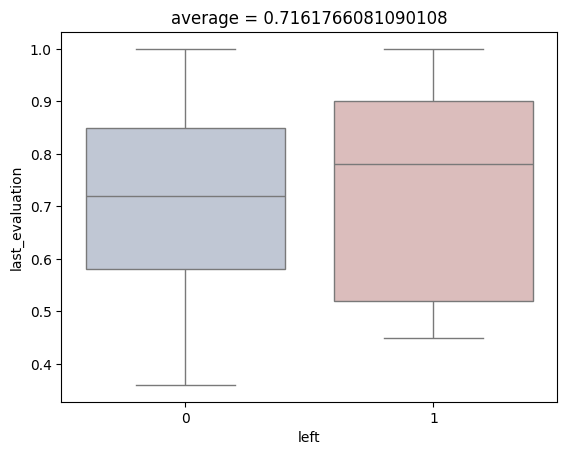

None


In [31]:
# last evaluation
hist_plot('last_evaluation', 'vlag')
box_plot('last_evaluation', 'vlag')

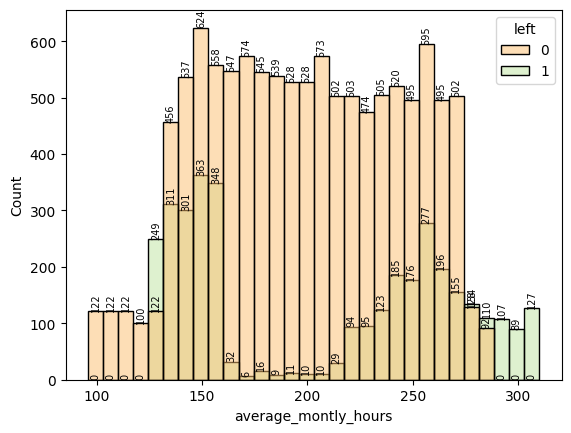

None


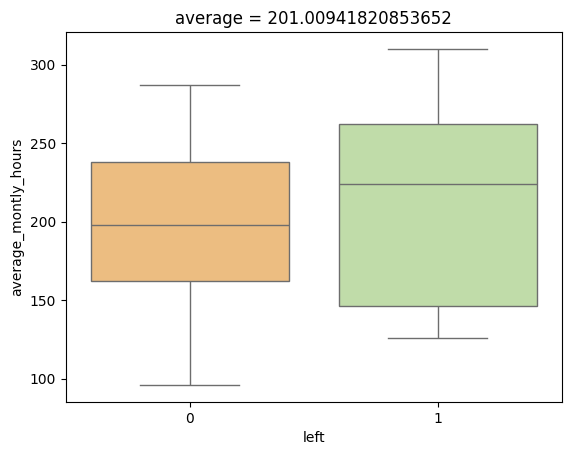

None


In [32]:
# hours worked in a month
hist_plot('average_montly_hours', 'Spectral')
box_plot('average_montly_hours', 'Spectral')

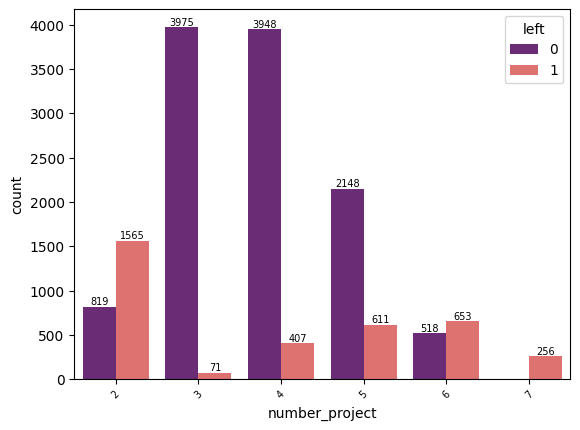

None


In [33]:
# number of projects
count_plot('number_project', 'magma')

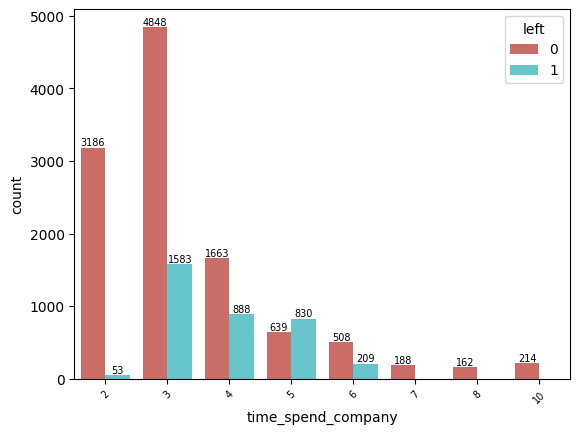

None


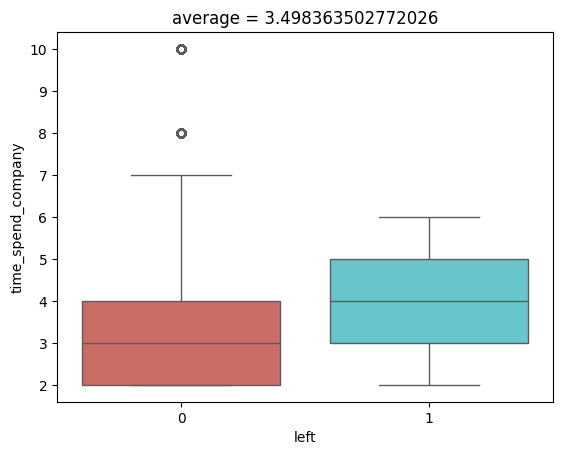

None


In [34]:
# time spent in the company
count_plot('time_spend_company', 'hls')
box_plot('time_spend_company', 'hls')

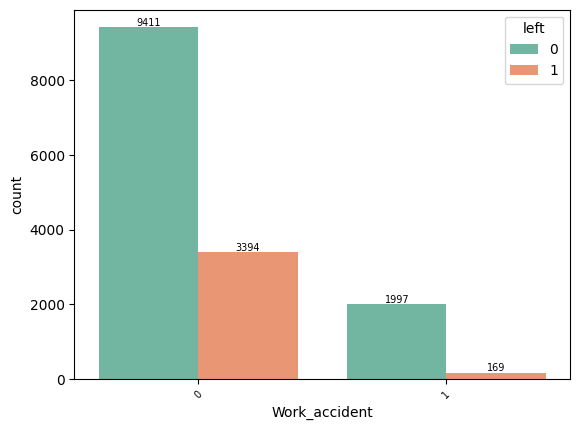

None


In [35]:
# work accident
count_plot('Work_accident', 'Set2')

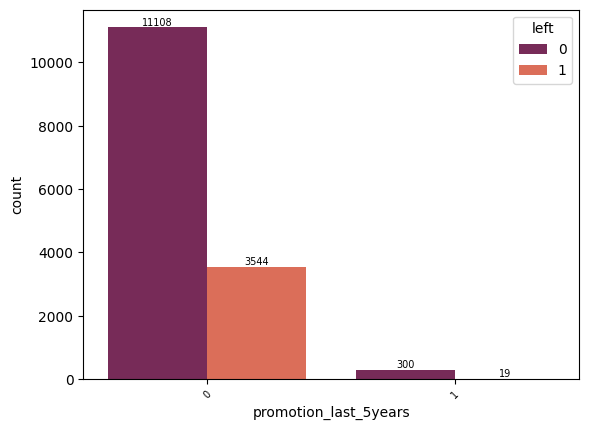

None


In [36]:
# promotion in the last 5 years
count_plot('promotion_last_5years', 'rocket')

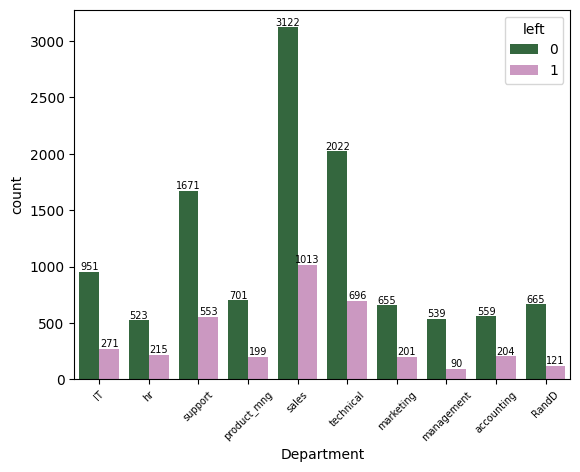

None


In [38]:
# Department
count_plot('Department', 'cubehelix')

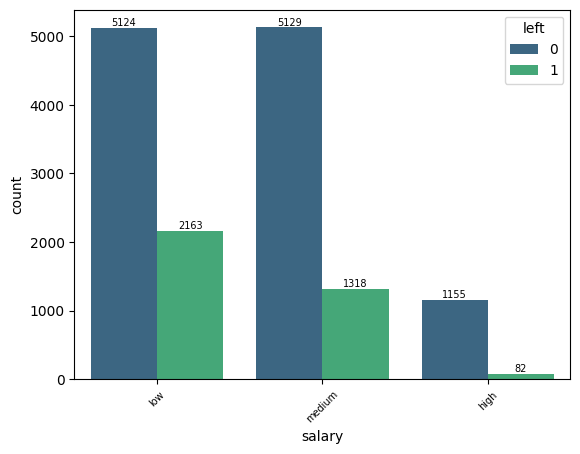

None


In [39]:
# Salary
count_plot('salary', 'viridis')

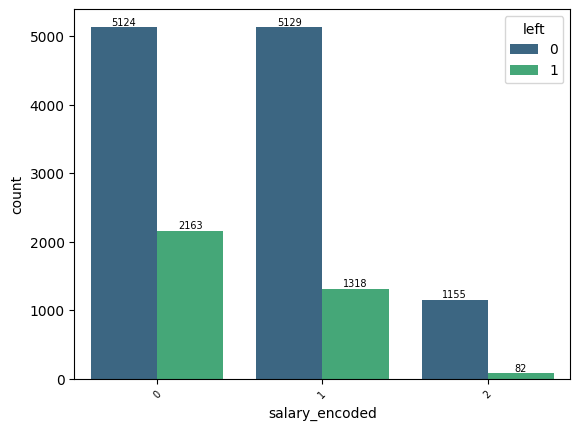

None


In [40]:
# salary_encoded
count_plot('salary_encoded', 'viridis')

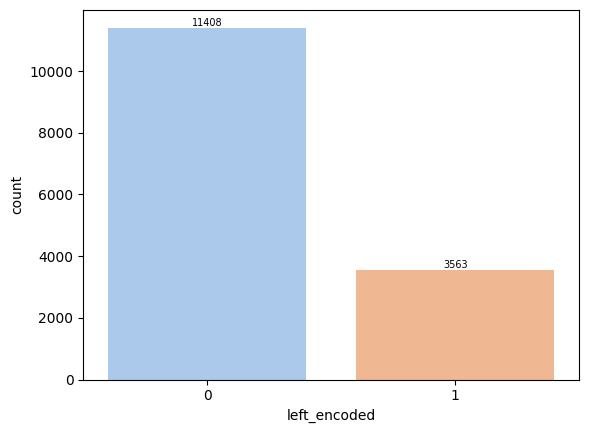

None


In [42]:
# Analyzing Dependent Variable (Y)

count = sns.countplot(data = df, x = 'left_encoded', hue = 'left', palette = 'pastel')
count.bar_label(count.containers[0], fontsize = 7)
count.bar_label(count.containers[1], fontsize = 7)
print(plt.show())

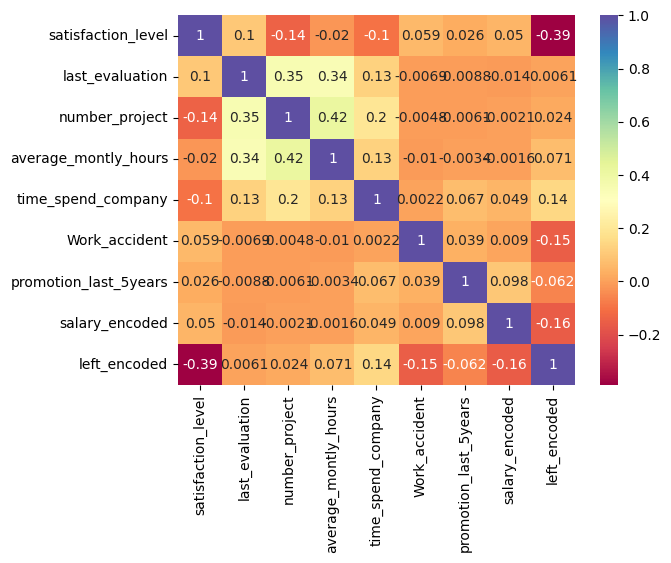

None


In [44]:
# Finding correlation
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'Spectral')
print(plt.show())

In [45]:
# Selecting features (X) and target (y)

X = df[
    ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company',
     'Work_accident', 'promotion_last_5years', 'salary_encoded']]
y = df['left_encoded']

In [46]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
#  Machine Learning Model
# using SVC

model = Pipeline([('scaler', StandardScaler()), ('svm', SVC(kernel = 'rbf', gamma = 'scale'))])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [48]:
#  Evaluation and Conclusion

# using f1 score to check accuracy and displaying Confusion matrix

print(f'f1_score = {f1_score(y_true = y_test, y_pred = y_pred)}')
print(f'accuracy_score = {accuracy_score(y_true = y_test, y_pred = y_pred)}')

f1_score = 0.927208480565371
accuracy_score = 0.9656093489148581


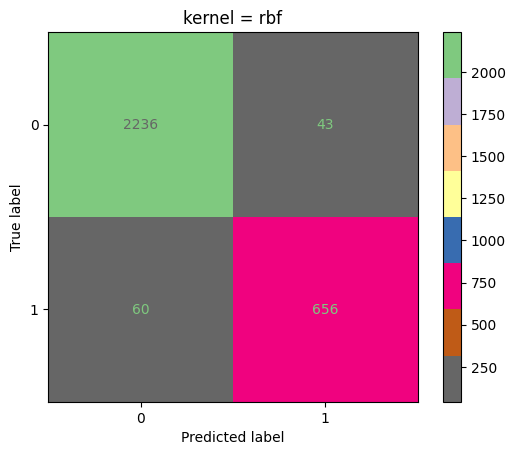

None


In [50]:
# Evaluating using ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap = "Accent_r")
plt.title("kernel = rbf")
print(plt.show())

In [51]:
# Selecting features (X) and target (y)

X = df[
    ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company',
     'Work_accident', 'promotion_last_5years', 'salary_encoded']]
y = df['left_encoded']

In [52]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [53]:
#  Machine Learning Model
# using Logistic Regression

model = Pipeline([('scaler', StandardScaler()), ('LogReg', LogisticRegression())])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [55]:
#  Evaluation and Conclusion

# using f1 score to check accuracy and displaying Confusion matrix

print(f'f1_score = {f1_score(y_true = y_test, y_pred = y_pred)}')
print(f'accuracy_score = {accuracy_score(y_true = y_test, y_pred = y_pred)}')

f1_score = 0.462478184991274
accuracy_score = 0.7943238731218698


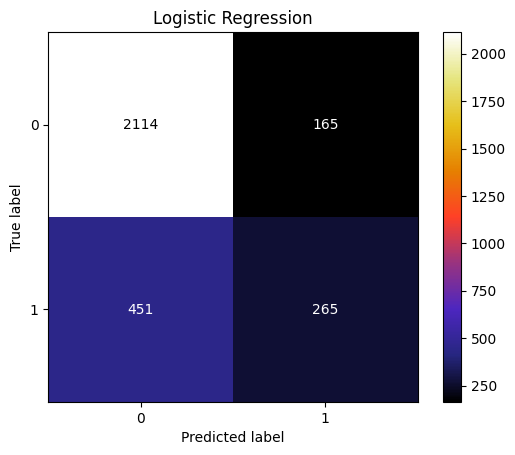

None


In [56]:
# Evaluating using ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap = "CMRmap")
plt.title("Logistic Regression")
print(plt.show())